## Observations and Insights 

In [1]:
#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


#get study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


#read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


#combine the data into a single dataset

study_data_complete = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')


#display the data table for preview

study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#checking the number of mice

len(study_data_complete['Mouse ID'].unique())

249

In [3]:
#getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 

duplicateMouse = study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']).any()
duplicates = study_data_complete['Mouse ID'].value_counts()
duplicates_df = pd.DataFrame(duplicates)
duplicates_df = duplicates_df.rename(columns={'Mouse ID':'Count of Mouse ID'})
duplicates_df.head()


,Count of Mouse ID
g989,13
z969,10
i334,10
a444,10
f545,10


In [4]:
#set index to mouse ID
#get all the data for the duplicate mouse IDs 


study_data_mouse_index = study_data_complete.set_index('Mouse ID')
study_data_mouse_index.head()

#check mouse data for duplicates id

duplicates_data = study_data_mouse_index.loc[['g989', 'y769', 'm650', 'r554', 'l509'],:]
duplicates_data.head(10)


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
#create a clean DataFrame by dropping the duplicate mice by their IDs

study_data_clean = study_data_complete.drop_duplicates('Mouse ID')
study_data_clean.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [6]:
#checking the number of mice in the clean DataFrame

len(study_data_clean['Mouse ID'])

249

## Summary Statistics

In [7]:
#generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each drug regimen

tumor_volume = study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

mean_tumor_volume = tumor_volume.mean()
median_tumor_volume = tumor_volume.median()
var_tumor_volume = tumor_volume.var()
std_tumor_volume = tumor_volume.std()
sem_tumor_volume = tumor_volume.sem()

drug_tumor_df = pd.DataFrame({
   'Mean Tumor Volume':mean_tumor_volume,
   'Median Tumor Volume':median_tumor_volume,
   'Var Tumor Volume':var_tumor_volume,
   'Std Tumor Volume':std_tumor_volume,
   'SEM Tumor Volume':sem_tumor_volume, 
})

drug_tumor_df.head(20)


,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume,Std Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#using the aggregation method, produce the same summary statistics in a single line

drug_tumor_df = study_data_complete.groupby('Drug Regimen').agg(Mean_Tumor_Volume = ('Tumor Volume (mm3)', np.mean),
Median_Tumor_Volume = ('Tumor Volume (mm3)', np.median),
Variance_Tumor_Volume = ('Tumor Volume (mm3)', np.var),
Stdev_Tumor_Volume = ('Tumor Volume (mm3)', np.std),
SEM_Tumor_Volume = ('Tumor Volume (mm3)', st.sem))
drug_tumor_df.head()

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [9]:
#generate a bar plot showing the total number of measurements taken on each drug regimen using pandas

measures_per_drug = study_data_clean['Drug Regimen'].value_counts()
drug_measures_df = pd.DataFrame({'Mice Count':measures_per_drug})

drug_measures_df.head(20)



,Mice Count
Ramicane,25
Ceftamin,25
Zoniferol,25
Capomulin,25
Infubinol,25
Naftisol,25
Ketapril,25
Propriva,25
Placebo,25
Stelasyn,24


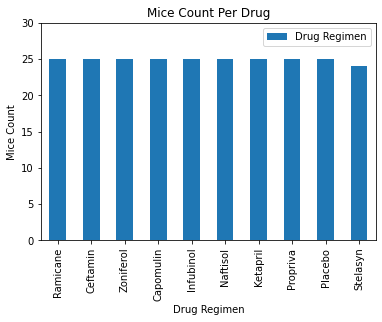

In [10]:

bar_chart = drug_measures_df.plot.bar(title='Mice Count Per Drug', ylim=(0,30), xlabel='Drug Regimen', ylabel='Mice Count', align='center')
bar_chart.legend(['Drug Regimen'])


<BarContainer object of 10 artists>

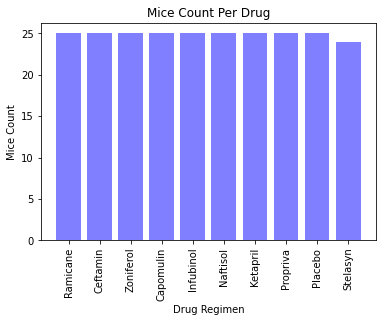

In [11]:
#generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot

x_axis = study_data_clean['Drug Regimen'].value_counts().keys()
y_axis = measures_per_drug

plt.xticks(rotation=90)
plt.title('Mice Count Per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align='center')



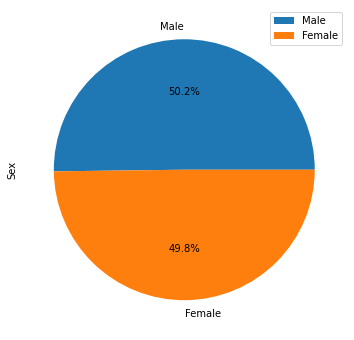

In [12]:
#generate a pie plot showing the distribution of female versus male mice using pandas

pie_plot_df = pd.DataFrame(study_data_clean['Sex'].value_counts())
plot = pie_plot_df.plot.pie(subplots=True, figsize=(6, 6), autopct='%1.1f%%')



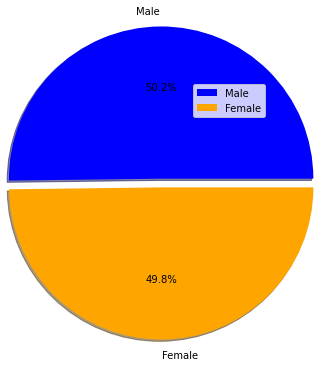

In [13]:
#generate a pie plot showing the distribution of female versus male mice using pyplot
#exploding and shadowing by larger value for fun

values = study_data_clean['Sex'].value_counts() 
labels = study_data_clean['Sex'].value_counts().keys()
colors = ['blue', 'orange']
explode = [0.1, 0]


plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, radius=1.75)
plt.legend(study_data_clean['Sex'].value_counts().keys())
plt.legend(loc='best')
plt.show()
 


## Quartiles, Outliers and Boxplots

In [14]:
study_data_clean = study_data_complete.drop_duplicates('Mouse ID')
study_data_clean.tail(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
240,y793,0,45.0,0,Capomulin,Male,17,17
241,g316,0,45.0,0,Capomulin,Female,22,22
242,g288,0,45.0,0,Capomulin,Male,3,19
243,l897,0,45.0,0,Capomulin,Male,17,19
244,w150,0,45.0,0,Capomulin,Male,23,23
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17
249,m601,0,45.0,0,Capomulin,Male,22,17


In [26]:
#calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin
#set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin


study_data_4drugs = study_data_clean.loc[(study_data_clean['Drug Regimen'] == 'Capomulin') | (study_data_clean['Drug Regimen'] == 'Ramicane')
                                        | (study_data_clean['Drug Regimen'] == 'Infubinol') | (study_data_clean['Drug Regimen'] == 'Ceftamin')]
study_data_4drugs = study_data_4drugs.set_index('Drug Regimen')
study_data_4drugs

# isolated view of just capomulin for later use


# Reset index so drug regimen column persists after inner merge


# get mouse count per drug


# Start by getting the last (greatest) timepoint for each mouse



#------------------------------------------------------------------------------------------------
#max_timepoints = study_data_clean.groupby(['Mouse ID'])['Timepoint'].max()
#max_timepoints = max_timepoints.reset_index()
#max_timepoint_merge = max_timepoints.merge(study_data_clean, on=['Mouse ID', 'Timepoint'], how='left')


#drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#tumor_vol_list = []
#mouse_id_list = []
#treatment_list = []

#for drug in drug_list:
 #  final_tumor_vol = max_timepoint_merge.loc[max_timepoint_merge["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
 #  tumor_vol_list.append(final_tumor_vol)
 #  mouse_id = max_timepoint_merge.loc[max_timepoint_merge['Drug Regimen'] == drug, 'Mouse ID'] 
 #  mouse_id_list.append(mouse_id)
 #  treatment = max_timepoint_merge.loc[max_timepoint_merge['Drug Regimen'] == drug, 'Drug Regimen']
 #  treatment_list.append(treatment) 

    
#final_tumor_volumes = pd.DataFrame({'Mouse ID':mouse_id_list, 'Drug Regimen': treatment_list, 'Final Tumor Volumes (mm3)': tumor_vol_list})
#final_tumor_volumes = final_tumor_volumes.dropna()
#final_tumor_volumes.head(10)
#final_tumor_volumes.tail(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.0,0,Female,9,22
Infubinol,c326,0,45.0,0,Female,18,25
Infubinol,c139,0,45.0,0,Male,11,28
Infubinol,v339,0,45.0,0,Male,20,26
Infubinol,a577,0,45.0,0,Female,6,25
...,...,...,...,...,...,...,...
Capomulin,t565,0,45.0,0,Female,20,17
Capomulin,i557,0,45.0,0,Female,1,24
Capomulin,m957,0,45.0,0,Female,3,19


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
